# Walmart - Confidence Interval and CLT


Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Understanding the Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [4]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [5]:
df.nunique().sort_values(ascending=False)

Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


'User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status' are categorical variables. As a result, we need to change the datatype to category.

In [8]:
col = ['User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status']
df[col] = df[col].astype('category')

In [9]:
df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Product_Category,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [45]:
df.describe(include=['object','category']).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


### Univariate Analysis

In [12]:
df['User_ID'].nunique()

5891

In [13]:
df['Product_ID'].nunique()

3631

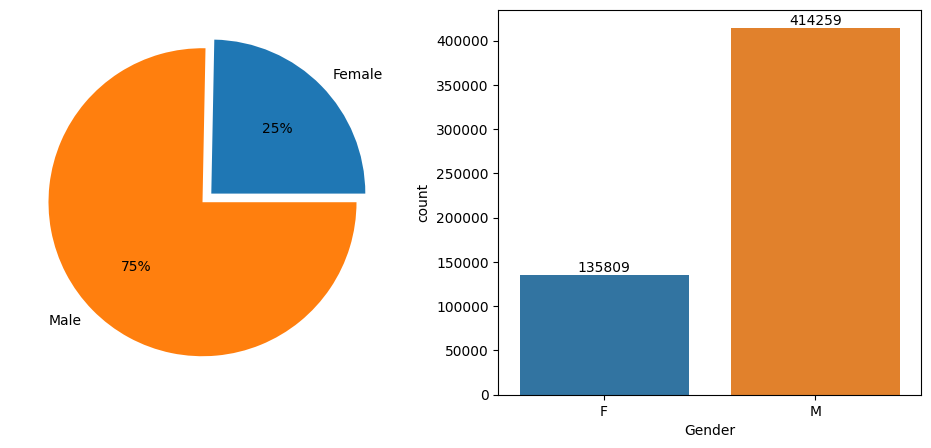

In [14]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
labels = ['Female','Male']
plt.pie(df.groupby('Gender')['Gender'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')
    
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Gender')
for i in label.containers:
    label.bar_label(i)
    
plt.show()

In [15]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

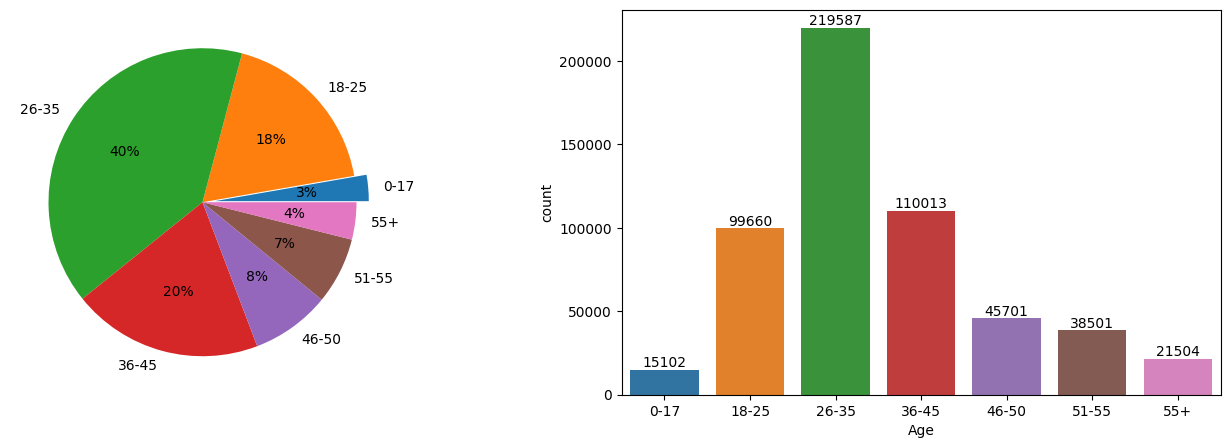

In [16]:
plt.figure(figsize = (17,5))

plt.subplot(1,2,1)
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.pie(df.groupby('Age')['Age'].count(), labels = labels, explode = (0.08,0,0,0,0,0,0), autopct = '%0.0f%%')
    
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Age')
for i in label.containers:
    label.bar_label(i)
    
plt.show()

In [17]:
df['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

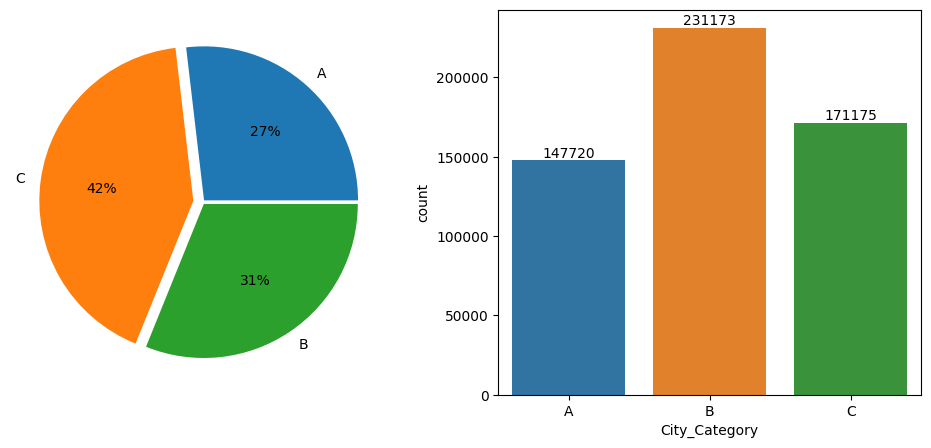

In [18]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
labels = ['A','C','B']
plt.pie(df.groupby('City_Category')['City_Category'].count(), labels = labels, explode = (0.015,0.06,0.015), autopct = '%0.0f%%')
    
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)
    
plt.show()

In [19]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

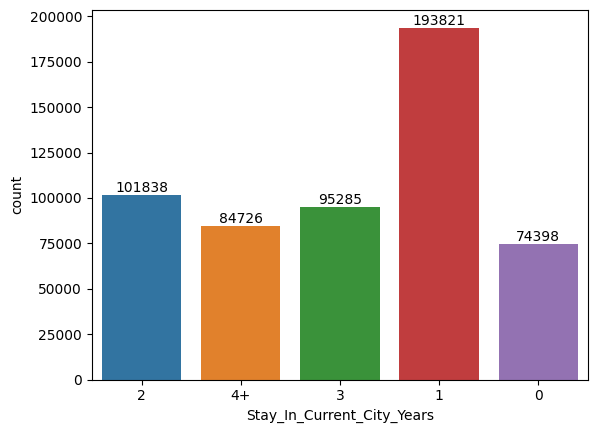

In [20]:
label = sns.countplot(data = df, x='Stay_In_Current_City_Years')
for i in label.containers:
    label.bar_label(i)

In [21]:
df['Marital_Status'].unique()

[0, 1]
Categories (2, int64): [0, 1]

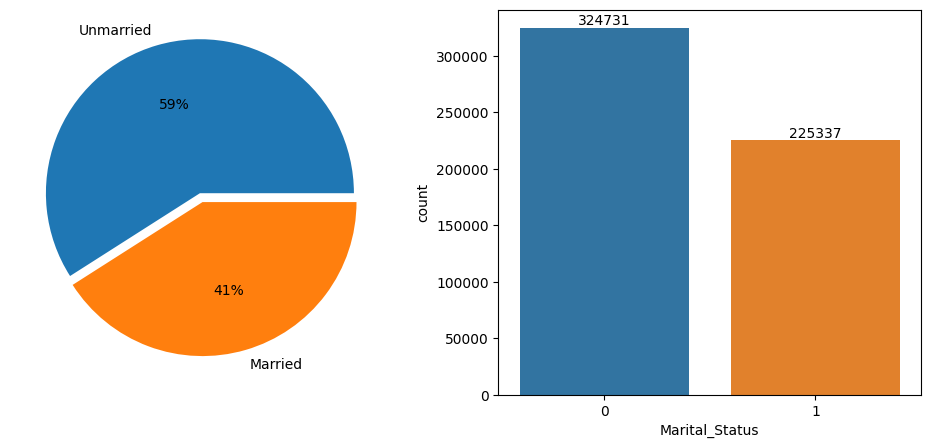

In [22]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
labels = ['Unmarried','Married']
plt.pie(df.groupby('Marital_Status')['Marital_Status'].count(), labels = labels, explode = (0.06,0), autopct = '%0.0f%%')
    
plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Marital_Status')
for i in label.containers:
    label.bar_label(i)
    
plt.show()

In [23]:
round(df['Purchase'].describe(),2)

count    550068.00
mean       9263.97
std        5023.07
min          12.00
25%        5823.00
50%        8047.00
75%       12054.00
max       23961.00
Name: Purchase, dtype: float64

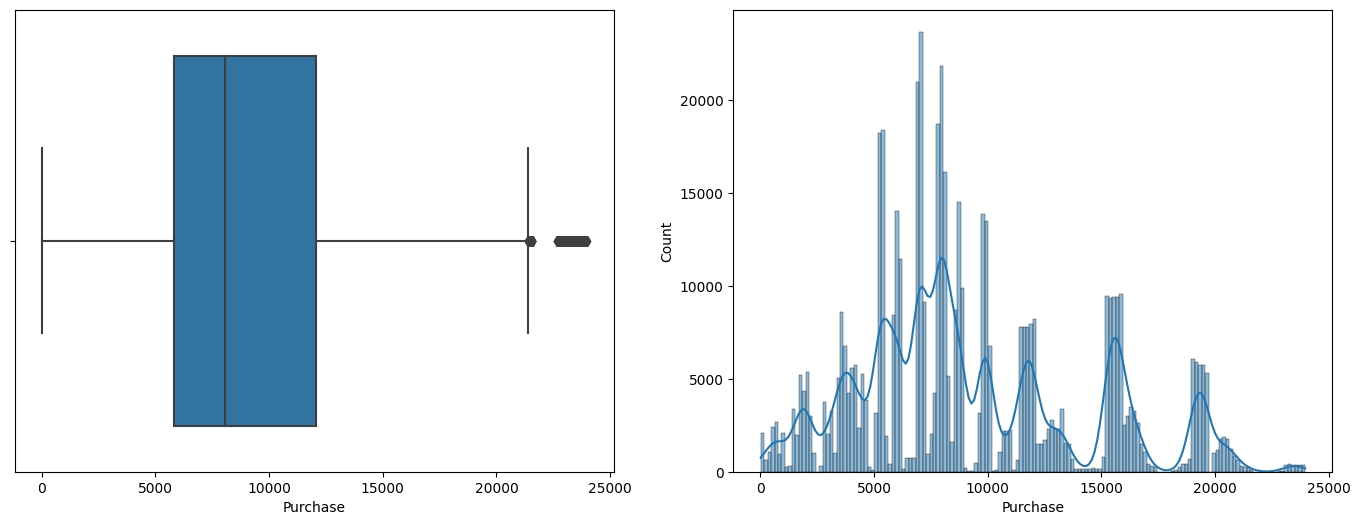

In [24]:
plt.figure(figsize=(17, 6))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Purchase', orient='h')

plt.subplot(1,2,2)
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

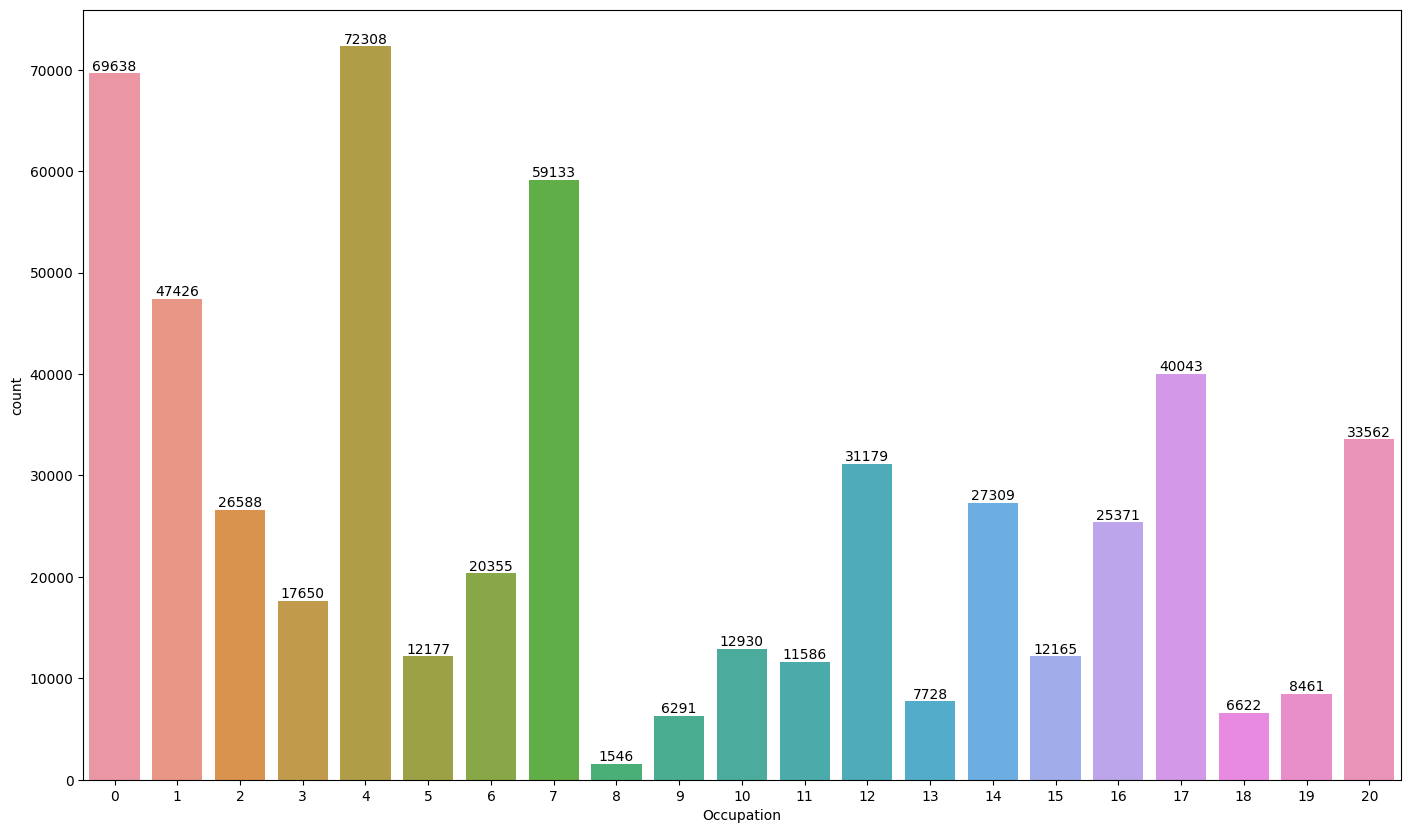

In [25]:
plt.figure(figsize=(17, 10))
label = sns.countplot(data = df, x='Occupation')
for i in label.containers:
    label.bar_label(i)

### Bi-variate Analysis

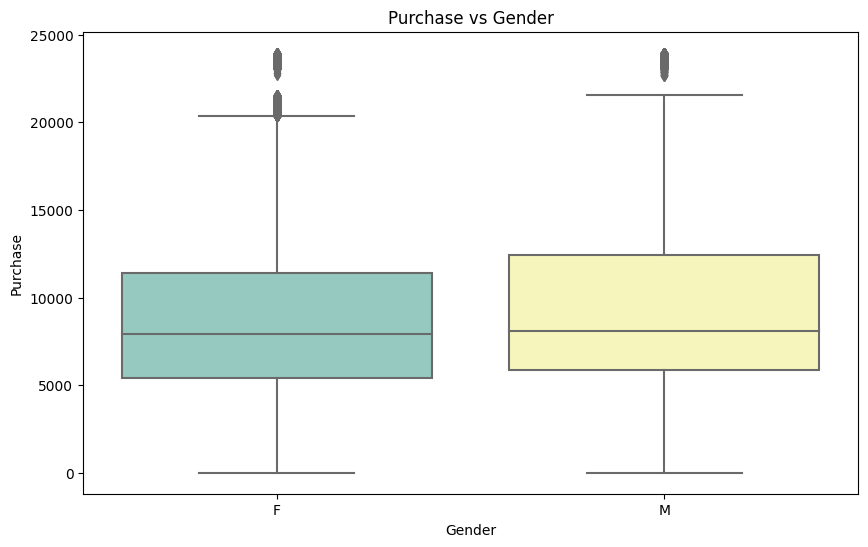

In [26]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, y ='Purchase', x = 'Gender', palette = 'Set3')
plt.title('Purchase vs Gender')
plt.show()

In [47]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


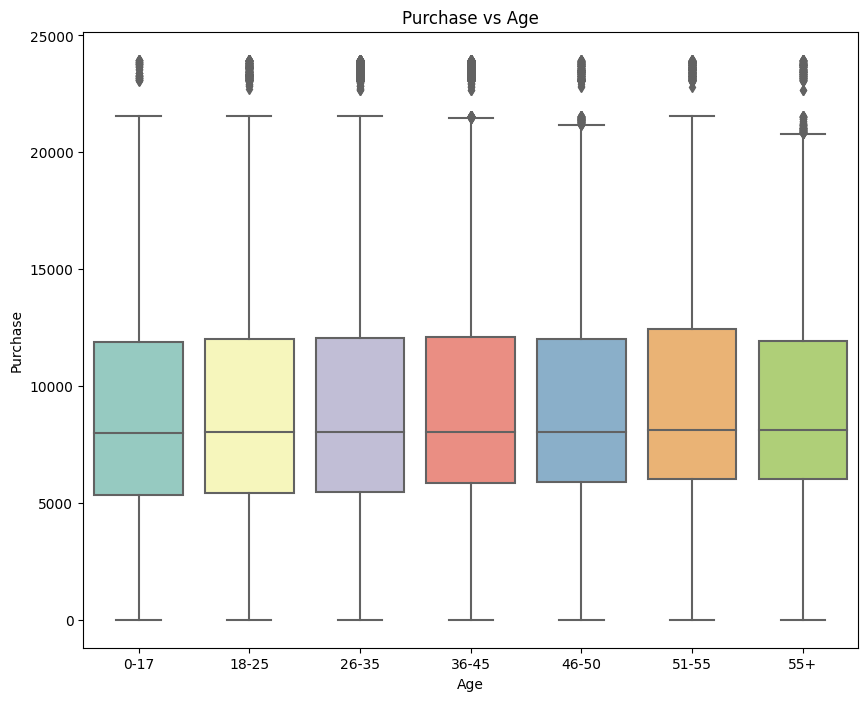

In [27]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, y ='Purchase', x = 'Age', palette = 'Set3')
plt.title('Purchase vs Age')
plt.show()

In [48]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


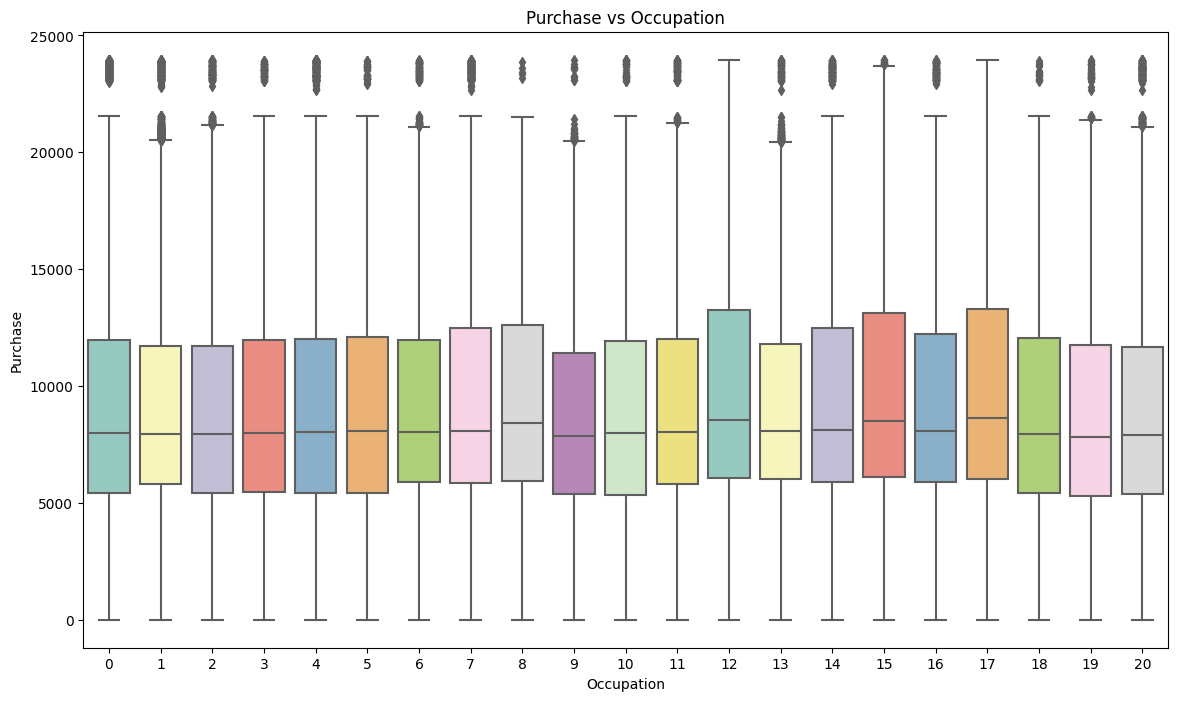

In [28]:
plt.figure(figsize = (14,8))
sns.boxplot(data = df, y ='Purchase', x = 'Occupation', palette = 'Set3')
plt.title('Purchase vs Occupation')
plt.show()

In [49]:
df.groupby(['Occupation'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


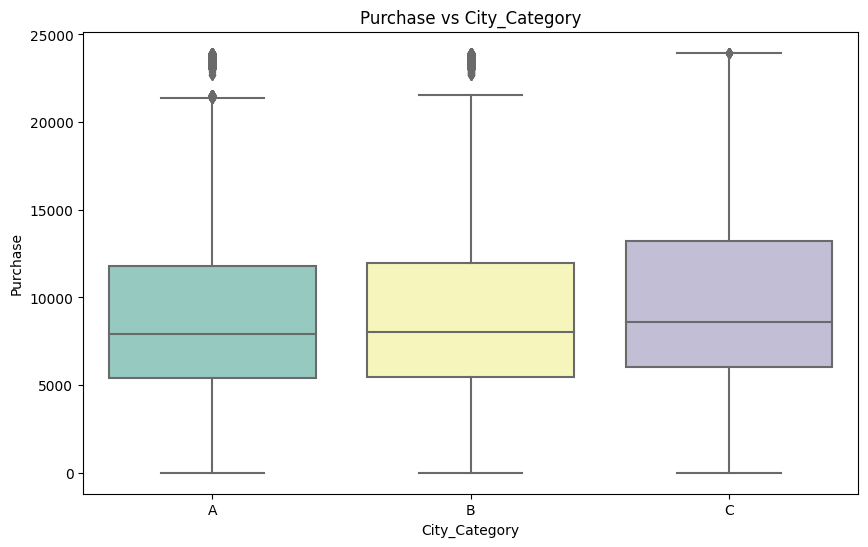

In [29]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, y ='Purchase', x = 'City_Category', palette = 'Set3')
plt.title('Purchase vs City_Category')
plt.show()

In [50]:
df.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


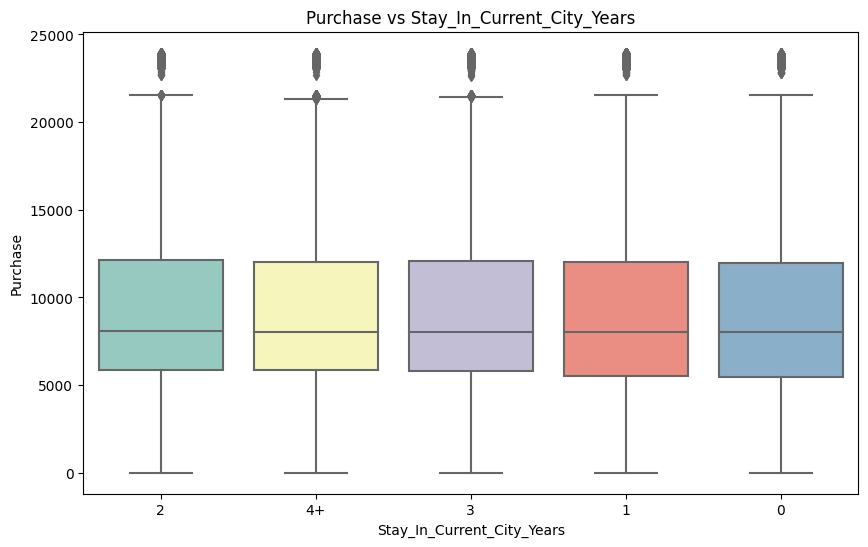

In [30]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, y ='Purchase', x = 'Stay_In_Current_City_Years', palette = 'Set3')
plt.title('Purchase vs Stay_In_Current_City_Years')
plt.show()

In [51]:
df.groupby(['Stay_In_Current_City_Years'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


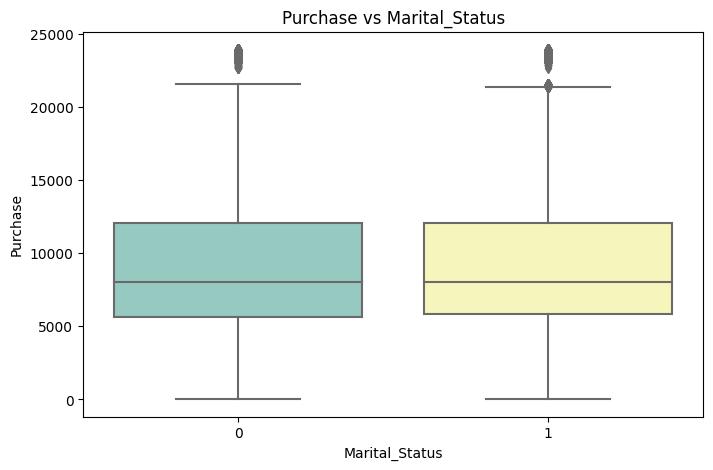

In [31]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, y ='Purchase', x = 'Marital_Status', palette = 'Set3')
plt.title('Purchase vs Marital_Status')
plt.show()

In [52]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


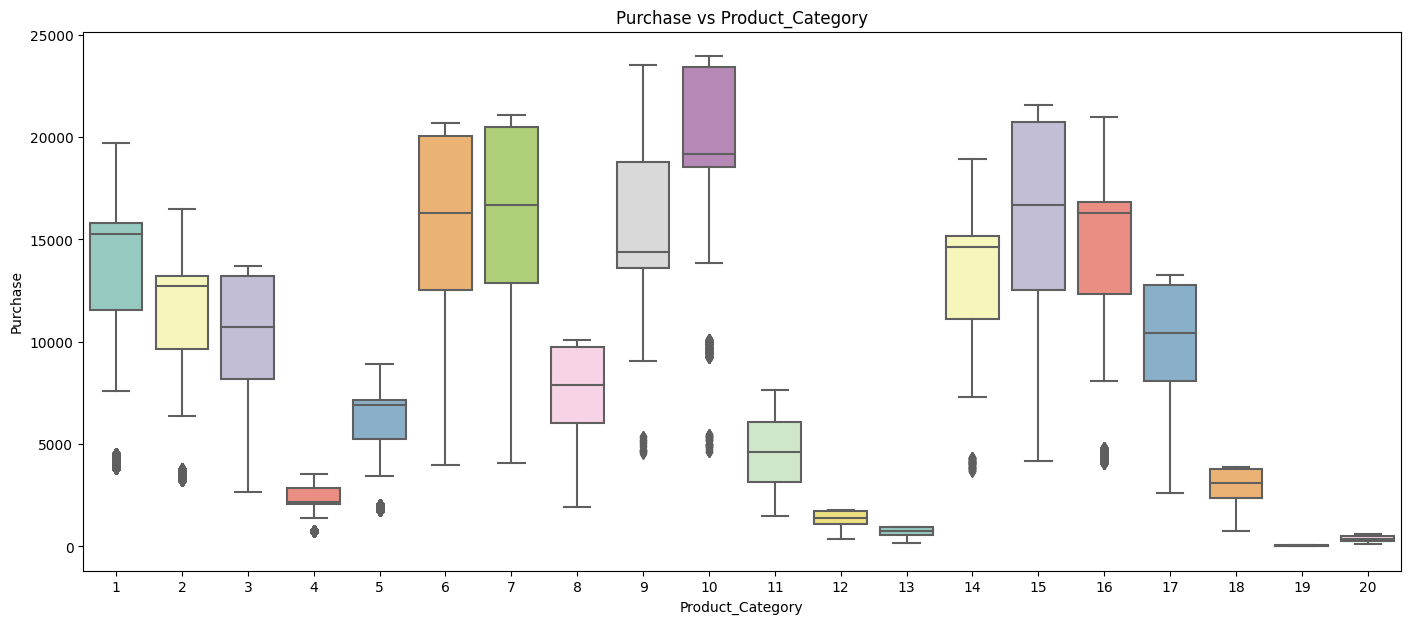

In [32]:
plt.figure(figsize = (17,7))
sns.boxplot(data = df, y ='Purchase', x = 'Product_Category', palette = 'Set3')
plt.title('Purchase vs Product_Category')
plt.show()

In [54]:
df.groupby(['Product_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


### Multi-variate Analysis

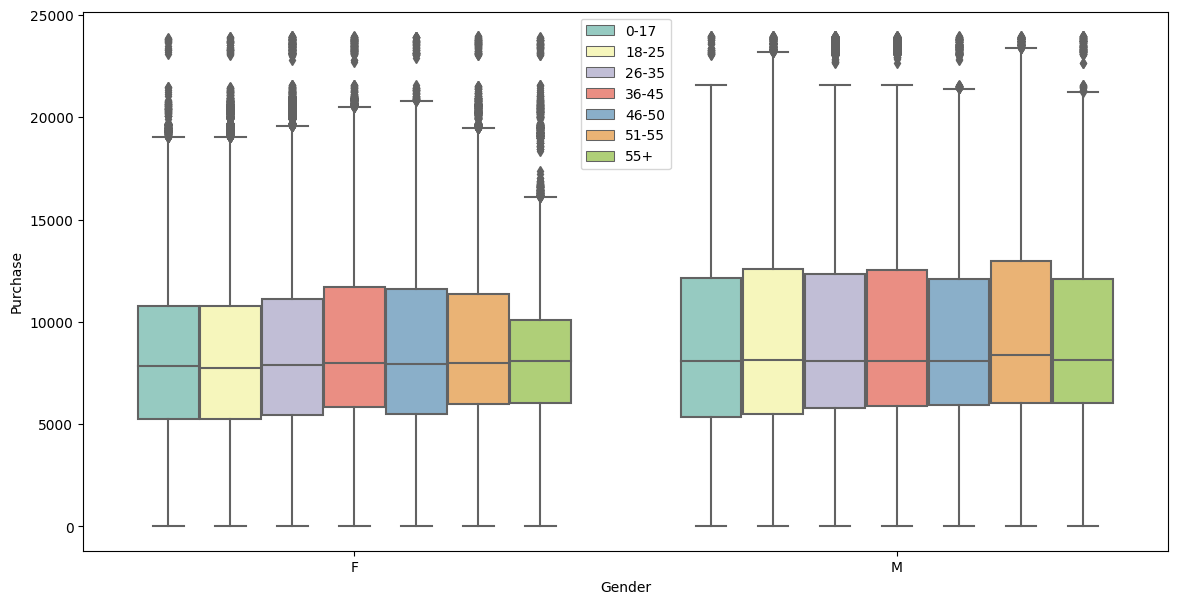

In [33]:
plt.figure(figsize = (14,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3')
plt.legend(loc=9)
plt.show()

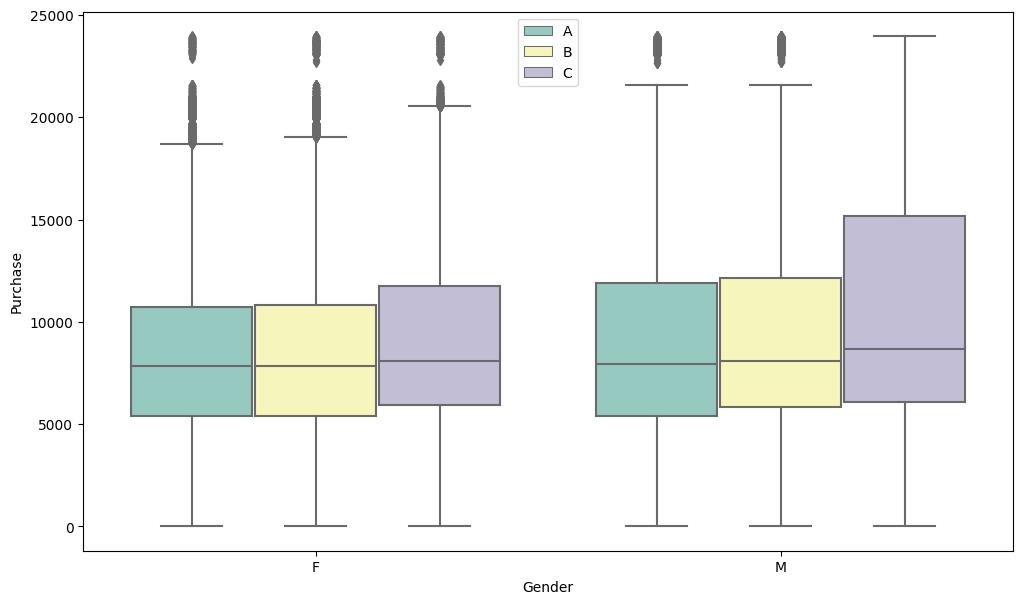

In [34]:
plt.figure(figsize = (12,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3')
plt.legend(loc=9)
plt.show()

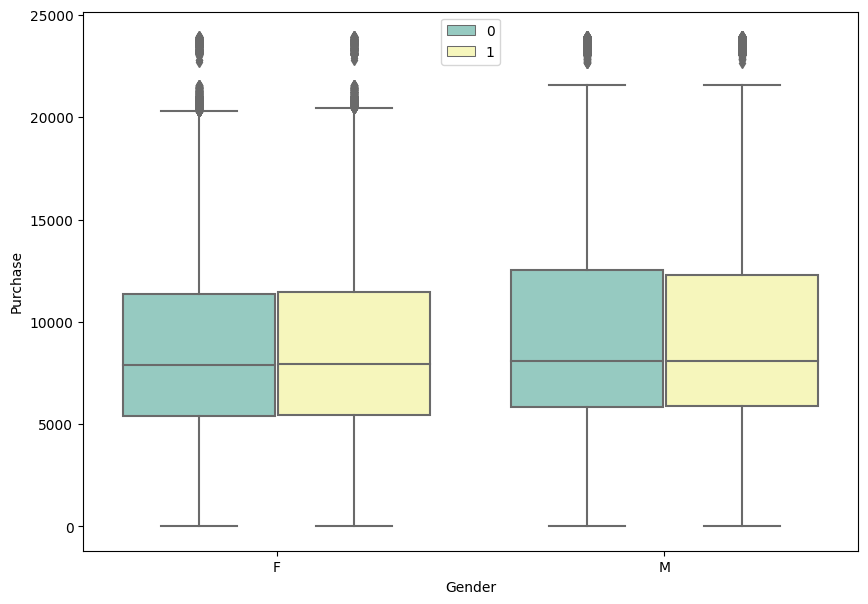

In [35]:
plt.figure(figsize = (10,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3')
plt.legend(loc=9)
plt.show()

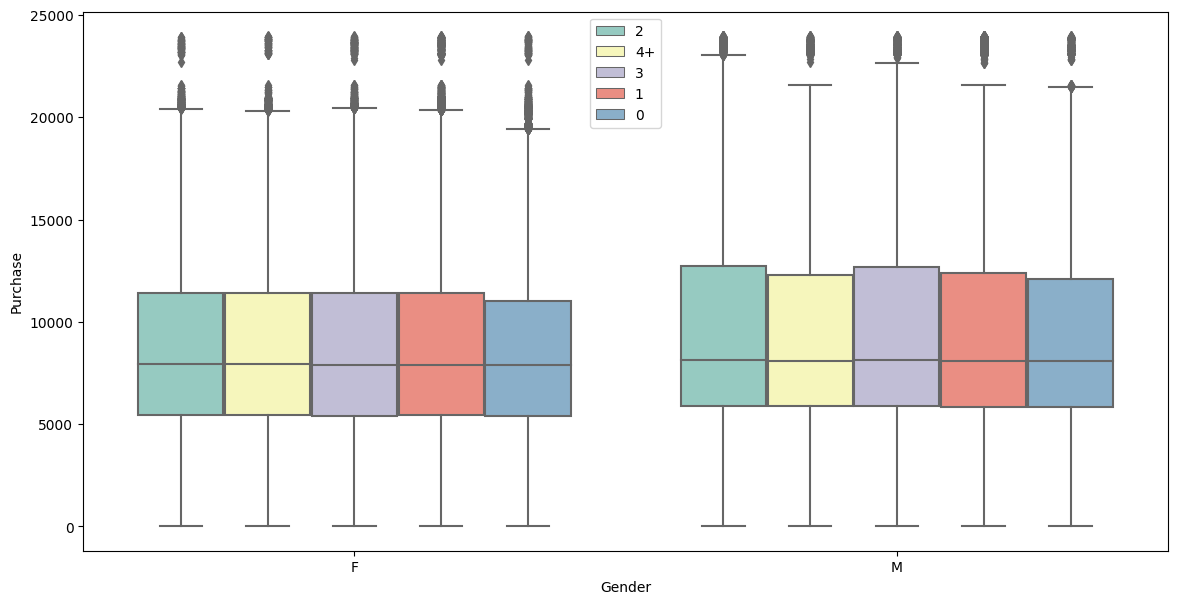

In [36]:
plt.figure(figsize = (14,7))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3')
plt.legend(loc=9)
plt.show()

C:\Users\Rhythm Shah\AppData\Local\Temp\ipykernel_22824\3614615914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


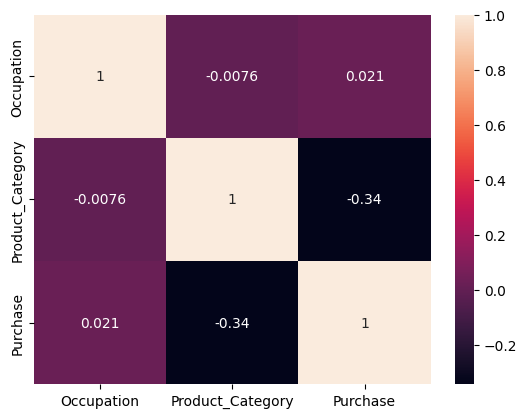

In [57]:
sns.heatmap(df.corr(), annot = True)
plt.show()

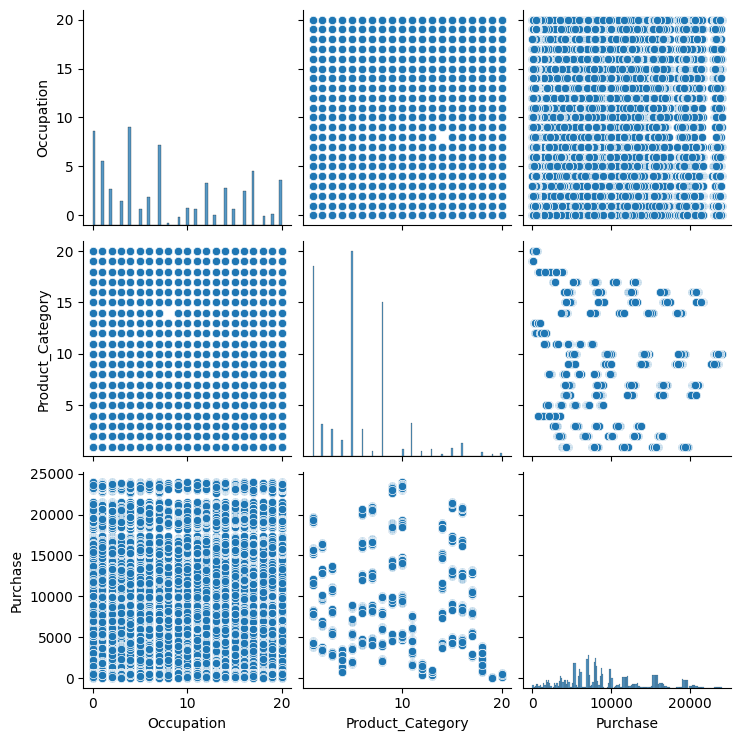

In [60]:
sns.pairplot(df)
plt.show()

### Confidence Interval and CLT

In [37]:
df.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [38]:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

In [39]:
def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100
    
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]
    
    lower_limit_1 = norm.ppf((1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
    upper_limit_1 = norm.ppf(ci+(1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
       
    lower_limit_2 = norm.ppf((1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)
    upper_limit_2 = norm.ppf(ci + (1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n) 
    
    sns.kdeplot(data = sample1_n, color="#467821", fill = True, linewidth = 2)
    sns.kdeplot(data = sample2_n ,color='#e5ae38', fill = True, linewidth = 2)
    
    return None

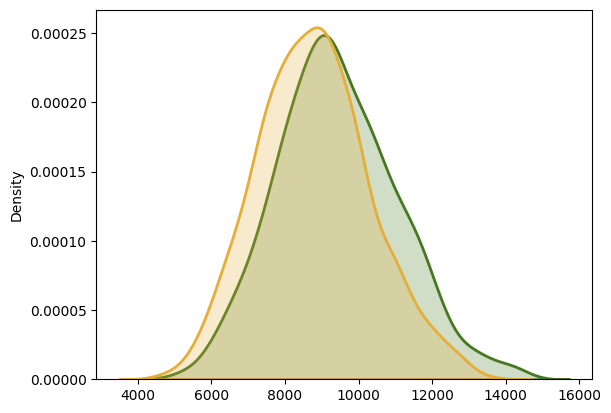

In [40]:
bootstrap(df_male['Purchase'],df_female['Purchase'],10)

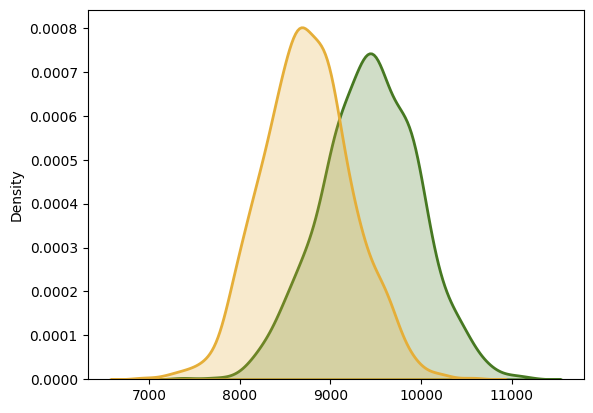

In [41]:
bootstrap(df_male['Purchase'],df_female['Purchase'],100)

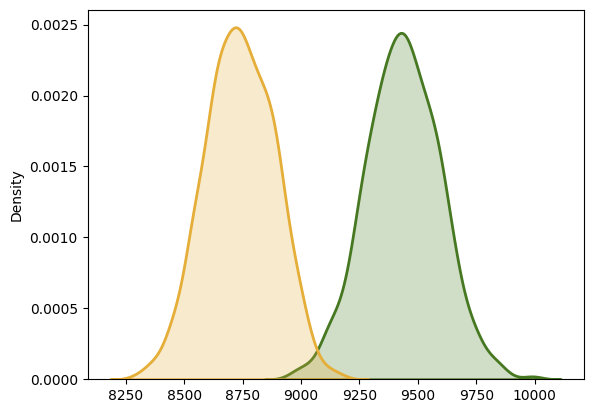

In [42]:
bootstrap(df_male['Purchase'],df_female['Purchase'],1000)

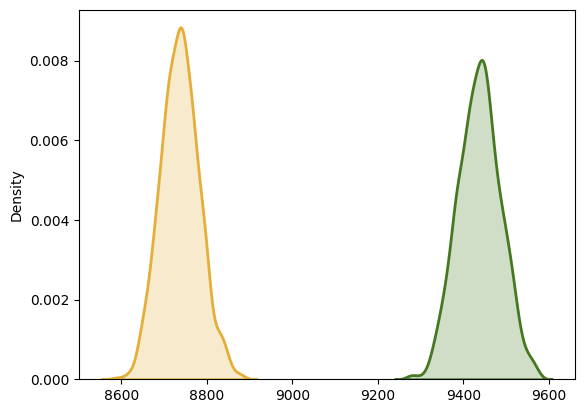

In [43]:
bootstrap(df_male['Purchase'],df_female['Purchase'],10000)

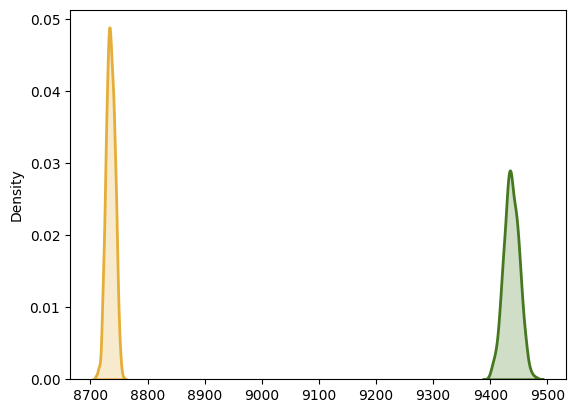

In [44]:
bootstrap(df_male['Purchase'],df_female['Purchase'],100000)